In [192]:
import pandas as pd
import numpy as np
data_location = "C:/Users/Camila/Desktop/DHDS/properati.csv"
data_desafio = pd.read_csv(data_location, sep=",", encoding = "UTF-8")

data_desafio.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [193]:
#Pasar todo a minuscula

data= data_desafio.applymap(lambda x: x if np.isreal(x) else str(x).lower())

data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,ph,mataderos,|argentina|capital federal|mataderos|,argentina,capital federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 ambientes tipo casa planta baja por pasillo,...",2 amb tipo casa sin expensas en pb,https://thumbs4.properati.com/8/bluuyihjlhgiik...
1,1,sell,apartment,la plata,|argentina|bs.as. g.b.a. zona sur|la plata|,argentina,bs.as. g.b.a. zona sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,venta de departamento en décimo piso al frente...,venta depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpvbu2ztha7jv...
2,2,sell,apartment,mataderos,|argentina|capital federal|mataderos|,argentina,capital federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 ambientes 3er piso lateral living comedor am...,2 amb 3er piso con ascensor apto credito,https://thumbs4.properati.com/5/sxkr34f_iwg3w_...


In [194]:
#columna: surface_total_in_m2

print("Columna surface_total_in_m2:",data['surface_covered_in_m2'])

print("----------------------------------------------")

#Cantidad de nulos
null_mask = data['surface_total_in_m2'].isnull()
print("Cantidad de nulos en columna surface_total_in_m2:",null_mask.sum())

print("----------------------------------------------")

#Porcentaje de nulos
porcentaje_mask = null_mask.sum() / data['surface_total_in_m2'].shape[0] * 100 
print("Porcentaje de nulos en surface_total_in_m2:",np.round(porcentaje_mask,2))

Columna surface_total_in_m2: 0          40.0
1           NaN
2          55.0
3           NaN
4          35.0
          ...  
121215     93.0
121216    360.0
121217     39.0
121218     48.0
121219     77.0
Name: surface_covered_in_m2, Length: 121220, dtype: float64
----------------------------------------------
Cantidad de nulos en columna surface_total_in_m2: 39328
----------------------------------------------
Porcentaje de nulos en surface_total_in_m2: 32.44


In [195]:
#Construcción columna clean
data["surface_total_in_m2_clean"] = data.surface_total_in_m2
data["surface_total_in_m2_clean"].max()

200000.0

In [196]:
#Limpieza de columna surface_total_in_m2
import re

#Busco mts2 en columna descripción y los guardo en columna "surface_total_in_m2_clean"

mts2_pattern = "(?P<mts2>\d\d\d\d?)\s?(?P<metros>mts|mt|metros|mt2|m2|m|mts2|m2c|mÂ²|mts²)"
mts2_pattern_regex = re.compile(mts2_pattern)

description_series = data.description

data_mts2_match = description_series.apply(lambda x:  x if x is np.NaN else mts2_pattern_regex.search(x))

#Relleno los nulos de "surface_total_in_m2_clean" con los resultados

mask_data_mts2_match_notnull = data_mts2_match.notnull()
mask_surface_total_isnull = data.surface_total_in_m2_clean.isnull()

mask_surface = mask_data_mts2_match_notnull & mask_surface_total_isnull

data.loc[mask_surface, "surface_total_in_m2_clean"] = \
data_mts2_match[mask_data_mts2_match_notnull].apply(lambda x: x.group("mts2"))

print("Cantidad de nulos:",data["surface_total_in_m2_clean"].isnull().sum())
data["surface_total_in_m2_clean"]


Cantidad de nulos: 31473


0          55
1         NaN
2          55
3         NaN
4          35
         ... 
121215    113
121216    360
121217     46
121218     48
121219     77
Name: surface_total_in_m2_clean, Length: 121220, dtype: object

In [197]:
data["surface_total_in_m2_clean"].astype(float).max()

200000.0

In [198]:
#Busco mts2 en columna title y los guardo en columna "surface_total_in_m2_clean"

mts2_pattern = "(?P<mts2>\d\d\d\d?)\s?(?P<metros>mts|mt|metros|mt2|m2|m|mts2|m2c|mÂ²|mts²)"
mts2_pattern_regex = re.compile(mts2_pattern)

title_series = data.title

data_mts2_match = title_series.apply(lambda x:  x if x is np.NaN else mts2_pattern_regex.search(x))

#Relleno los nulos con los resultados

mask_data_mts2_match_notnull = data_mts2_match.notnull()
mask_surface_total_isnull = data.surface_total_in_m2_clean.isnull()

mask_surface = mask_data_mts2_match_notnull & mask_surface_total_isnull

data.loc[mask_surface, "surface_total_in_m2_clean"] = \
data_mts2_match[mask_data_mts2_match_notnull].apply(lambda x: x.group("mts2"))

print("Cantidad de nulos:",data["surface_total_in_m2_clean"].isnull().sum())

data["surface_total_in_m2_clean"]

Cantidad de nulos: 31304


0          55
1         NaN
2          55
3         NaN
4          35
         ... 
121215    113
121216    360
121217     46
121218     48
121219     77
Name: surface_total_in_m2_clean, Length: 121220, dtype: object

In [199]:
#Miro proporción de superficie cubierta en superficie total

#Para eso, creamos máscaras de los valores no nulos de superficie total y cubierta.
surface_total_in_m2_clean = data["surface_total_in_m2_clean"].astype(float)

surface_covered_in_m2_notnull = data.surface_covered_in_m2.notnull()
surface_covered_in_m2_notnull_mask = data.surface_covered_in_m2[surface_covered_in_m2_notnull]

surface_total_in_m2_clean_notnull = surface_total_in_m2_clean.notnull()
surface_total_in_m2_clean_notnull_mask = data.surface_total_in_m2_clean[surface_total_in_m2_clean_notnull]

surface__notnullmask = surface_covered_in_m2_notnull_mask.index & \
surface_total_in_m2_clean_notnull_mask.index

#Calculamos la proporción
proporcion_superficies = \
data.surface_covered_in_m2[surface__notnullmask] / surface_total_in_m2_clean[surface__notnullmask] * 100 
proporcion_superficies

0          72.727273
2         100.000000
4         100.000000
6          73.584906
7          88.888889
             ...    
121215     82.300885
121216    100.000000
121217     84.782609
121218    100.000000
121219    100.000000
Length: 80210, dtype: float64

In [200]:
data["surface_total_in_m2_clean"]

0          55
1         NaN
2          55
3         NaN
4          35
         ... 
121215    113
121216    360
121217     46
121218     48
121219     77
Name: surface_total_in_m2_clean, Length: 121220, dtype: object

In [201]:
#Observamos que porcentaje de la superficie cubierta representa 100% o más del total

proporcion_superficies_mayor100 = proporcion_superficies >= 100

resultado_proporcion_superficies_mayor100 = np.around(len(proporcion_superficies[proporcion_superficies_mayor100]) / \
          len(data.surface_covered_in_m2[surface_covered_in_m2_notnull_mask]) * 100, 2)

print("Porcentaje de observaciones en las cuales la supercie cubierta representa el 100% o más del total:",\
 resultado_proporcion_superficies_mayor100,"%")

print("Observamos que en más del",resultado_proporcion_superficies_mayor100,"%\
de los casos la superficie cubierta es el 100% o más del total")

Porcentaje de observaciones en las cuales la supercie cubierta representa el 100% o más del total: 26.85 %
Observamos que en más del 26.85 %de los casos la superficie cubierta es el 100% o más del total


In [202]:
#Observamos que porcentaje de la superficie cubierta representa 85% o más del total

proporcion_superficies_mayorigual85 = proporcion_superficies >= 85

resultado_proporcion_superficies_mayorigual85 = np.around(len(proporcion_superficies[proporcion_superficies_mayorigual85])/ \
          len(data.surface_covered_in_m2[surface_covered_in_m2_notnull_mask]) * 100, 2 )

print("Porcentaje de observaciones en las cuales la supercie cubierta representa el 85% o más del total:",\
resultado_proporcion_superficies_mayorigual85,"%")

print("Observamos que en más del",resultado_proporcion_superficies_mayorigual85,"% \
de los casos la superficie cubierta es el 85% o más del total")

Porcentaje de observaciones en las cuales la supercie cubierta representa el 85% o más del total: 48.98 %
Observamos que en más del 48.98 % de los casos la superficie cubierta es el 85% o más del total


--------------------------------------------------------------
Por este motivo podemos concluir que la columna 'surface_covered_in_m2' puede ser absorbida por 'surface_total_in_m2'.
--------------------------------------------------------------

In [203]:
#Reemplazamos las filas en las cuales 'surface_covered_in_m2' tiene datos y "surface_total_in_m2_clean" tiene nulos

#Para eso, creamos máscaras de los valores no nulos de superficie cubierta y nulos de superficie total.

surface_covered_in_m2_notnull = data.surface_covered_in_m2.notnull()
surface_covered_in_m2_notnull_mask = data.surface_covered_in_m2[surface_covered_in_m2_notnull]

surface_total_in_m2_clean_isnull = surface_total_in_m2_clean.isnull()
surface_total_in_m2_clean_isnull_mask = data.surface_total_in_m2_clean[surface_total_in_m2_clean_isnull]

surface_reemplazo_mask = surface_covered_in_m2_notnull_mask.index & \
surface_total_in_m2_clean_isnull_mask.index

# Y reemplazamos los valores de estos índices en surface_total_in_m2_clean

data.loc[surface_reemplazo_mask, "surface_total_in_m2_clean"] = data.surface_covered_in_m2[surface_reemplazo_mask]

data.loc[surface_reemplazo_mask, "surface_total_in_m2_clean"]

68         72
77         85
79         42
87        170
89         53
         ... 
121149    195
121150     52
121151     72
121152     33
121210    120
Name: surface_total_in_m2_clean, Length: 21103, dtype: object

In [204]:
porcentaje_nulos_surface = data["surface_total_in_m2_clean"].isnull().sum() /\
data["surface_total_in_m2_clean"].shape[0] * 100

print("Luego de los pasos anteriores, el porcentaje de nulos en la columna surface_total_in_m2_clean es:",\
      np.round(porcentaje_nulos_surface, 2),"%")

Luego de los pasos anteriores, el porcentaje de nulos en la columna surface_total_in_m2_clean es: 8.42 %


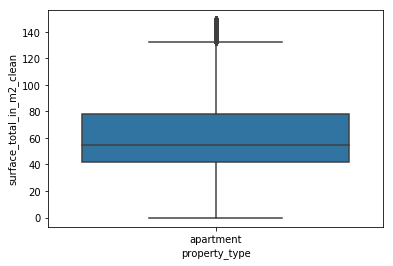

In [205]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Análisis de los valores de mts2 para apartamentos
property_values = ['apartment']

data_property_mask = data.property_type.apply(lambda x: x in property_values)

data_surface_order_mask = data.surface_total_in_m2_clean.astype(float) < 150

data_property_surface_mask = data_property_mask & data_surface_order_mask
data_property_mask = data_property_mask

data_property = data.loc[data_property_surface_mask, :]

sns.boxplot(data.property_type[data_property_surface_mask], data.surface_total_in_m2_clean.astype(float)[data_property_surface_mask],\
            data = data_property)

In [206]:
#Busco outliers

mask_apartment = data["property_type"] == 'apartment'

surface_apartment = data["surface_total_in_m2_clean"][mask_apartment]

surface_apartment = surface_apartment.astype(float)

q1_apart = surface_apartment.quantile(q=0.25)
q3_apart = surface_apartment.quantile(q=0.75)

iqr = (q3_apart - q1_apart) * 1.5

up_threshold = q3_apart + iqr
low_threshold = q1_apart - iqr

outlier_mask_up = surface_apartment  > up_threshold
outlier_mask_down = surface_apartment  < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)


outliers_apartment = surface_apartment[outlier_mask]
notoutliers_apartment = surface_apartment[not_outliers]

                            

In [207]:
#Reemplazo los nulos en apartamentos de la columna "surface_total_in_m2_clean" por el promedio en esta categoría

mask_aparment_surface_isnull = mask_apartment & data["surface_total_in_m2_clean"].isnull()

mask_aparment_surface_notnull = not_outliers & data["surface_total_in_m2_clean"].notnull()

result_mask_aparment_surface = data.surface_total_in_m2_clean[mask_aparment_surface_notnull]

data.loc[mask_aparment_surface_isnull , "surface_total_in_m2_clean"]= round(result_mask_aparment_surface.astype(float).mean(),0)

data["surface_total_in_m2_clean"][mask_apartment].isnull().sum()


0

In [208]:
data["surface_total_in_m2_clean"]

0          55
1          64
2          55
3         NaN
4          35
         ... 
121215    113
121216    360
121217     46
121218     48
121219     77
Name: surface_total_in_m2_clean, Length: 121220, dtype: object

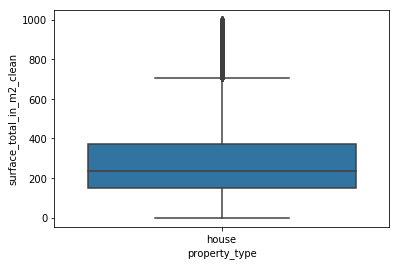

In [209]:
#Análisis de los valores de mts2 para casas
property_values = ['house']

data_property_mask = data.property_type.apply(lambda x: x in property_values)

data_surface_order_mask = data.surface_total_in_m2_clean.astype(float) < 1000

data_property_surface_mask = data_property_mask & data_surface_order_mask
data_property_mask = data_property_mask

data_property = data.loc[data_property_surface_mask, :]

sns.boxplot(data.property_type[data_property_surface_mask], data.surface_total_in_m2_clean.astype(float)[data_property_surface_mask],\
            data = data_property)

In [210]:
#Busco outliers

mask_house = data["property_type"] == 'house'

surface_house = data["surface_total_in_m2_clean"][mask_house]

surface_house = surface_house.astype(float)


q1_house = surface_house.quantile(q=0.25)
q3_house = surface_house.quantile(q=0.75)

iqr = (q3_house - q1_house) * 1.5

up_threshold = q3_house + iqr
low_threshold = q1_house - iqr

outlier_mask_up = surface_house  > up_threshold
outlier_mask_down = surface_house  < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)


outliers_house= surface_house[outlier_mask]
notoutliers_house = surface_house[not_outliers]


In [211]:
#Reemplazo los outliers y nulos en apartamentos de la columna "surface_total_in_m2_clean" por el promedio en esta categoría

mask_house_surface_isnull = mask_house & data["surface_total_in_m2_clean"].isnull()

mask_aparment_surface_notnull = not_outliers & data["surface_total_in_m2_clean"].notnull()

result_mask_house_surface = data.surface_total_in_m2_clean[mask_house_surface_notnull]

data.loc[mask_house_surface_isnull , "surface_total_in_m2_clean"]= round(result_mask_house_surface.astype(float).mean(),0)

data["surface_total_in_m2_clean"][mask_house].isnull().sum()

0

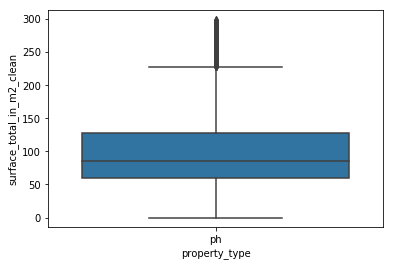

In [212]:
#Análisis de los valores de mts2 para PH

property_values = ['ph']

data_property_mask = data.property_type.apply(lambda x: x in property_values)

data_surface_order_mask = data.surface_total_in_m2_clean.astype(float) < 300

data_property_surface_mask = data_property_mask & data_surface_order_mask
data_property_mask = data_property_mask

data_property = data.loc[data_property_surface_mask, :]

sns.boxplot(data.property_type[data_property_surface_mask], data.surface_total_in_m2_clean.astype(float)[data_property_surface_mask],\
            data = data_property)


In [213]:
#Busco outliers

mask_ph = data["property_type"] == 'ph'

surface_ph = data["surface_total_in_m2_clean"][mask_ph]

surface_ph = surface_ph.astype(float)


q1_ph = surface_ph.quantile(q=0.25)
q3_ph = surface_ph.quantile(q=0.75)

iqr = (q3_ph - q1_ph) * 1.5

up_threshold = q3_ph + iqr
low_threshold = q1_ph - iqr

outlier_mask_up = surface_ph  > up_threshold
outlier_mask_down = surface_ph  < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)


outliers_ph = surface_ph[outlier_mask]
notoutliers_ph = surface_ph[not_outliers]


In [214]:
#Reemplazo los outliers y nulos en apartamentos de la columna "surface_total_in_m2_clean" por el promedio en esta categoría

mask_ph_surface_isnull = mask_ph & data["surface_total_in_m2_clean"].isnull()

mask_ph_surface_notnull = not_outliers & data["surface_total_in_m2_clean"].notnull()

result_mask_ph_surface = data.surface_total_in_m2_clean[mask_ph_surface_notnull]

data.loc[mask_ph_surface_isnull , "surface_total_in_m2_clean"]= round(result_mask_ph_surface.astype(float).mean(),0)

data["surface_total_in_m2_clean"][mask_ph].isnull().sum()

0

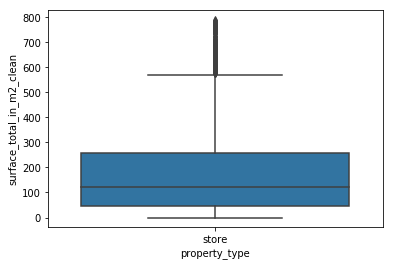

In [215]:
#Análisis de los valores de mts2 para store

property_values = ['store']

data_property_mask = data.property_type.apply(lambda x: x in property_values)

data_surface_order_mask = data.surface_total_in_m2_clean.astype(float) < 800

data_property_surface_mask = data_property_mask & data_surface_order_mask
data_property_mask = data_property_mask

data_property = data.loc[data_property_surface_mask, :]

sns.boxplot(data.property_type[data_property_surface_mask], data.surface_total_in_m2_clean.astype(float)[data_property_surface_mask],\
            data = data_property)

In [216]:
#Busco outliers

mask_store = data["property_type"] == 'store'
data_store = data["property_type"][mask_store]

surface_store = data["surface_total_in_m2_clean"][mask_store]

surface_store = surface_store.astype(float)


q1_store = surface_store.quantile(q=0.25)
q3_store = surface_store.quantile(q=0.75)

iqr = (q3_store - q1_store) * 1.5

up_threshold = q3_store + iqr
low_threshold = q1_store - iqr

outlier_mask_up = surface_store  > up_threshold
outlier_mask_down = surface_store  < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)


outliers_store = surface_store[outlier_mask]
notoutliers_store = surface_store[not_outliers]


In [224]:
#Reemplazo los outliers y nulos en apartamentos de la columna "surface_total_in_m2_clean" por el promedio en esta categoría

mask_store_surface_isnull = mask_store & data["surface_total_in_m2_clean"].isnull()

mask_store_surface_notnull = not_outliers & data["surface_total_in_m2_clean"].notnull()

result_mask_store_surface = data.surface_total_in_m2_clean[mask_store_surface_notnull]

data.loc[mask_store_surface_isnull , "surface_total_in_m2_clean"]= round(result_mask_store_surface.astype(float).mean(),0)

data["surface_total_in_m2_clean"][mask_store].isnull().sum()

0

In [218]:
porcentaje_nulos_surface = data["surface_total_in_m2_clean"].isnull().sum() /\
data["surface_total_in_m2_clean"].shape[0] * 100

print("Luego de los pasos anteriores, el porcentaje de nulos en la columna surface_total_in_m2_clean es:",\
      np.round(porcentaje_nulos_surface, 2),"%")

Luego de los pasos anteriores, el porcentaje de nulos en la columna surface_total_in_m2_clean es: 0.0 %


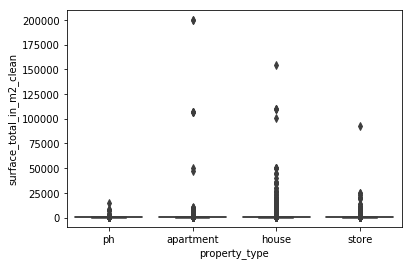

In [222]:
property_values = ['ph', 'store', 'house','apartment']

data_property_mask = data.property_type.apply(lambda x: x in property_values)

data_property = data.loc[data_property_mask, :]

sns.boxplot(data.property_type, data.surface_total_in_m2_clean.astype(float), data = data_property)
